In [54]:
import numpy as np
import pandas as pd
import torch

import plotly.graph_objects as go

rng = np.random.default_rng()

In [55]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

In [56]:
import sys
sys.path.append('../') # now can access entire repository, (important when running locally)

In [57]:
# from orbit_datasets import neworbits, versatileorbits, staticorbits
from ldcl.data.physics import get_dataset

In [58]:
def ax_plot(ax, orbits_dataset, title, idxs=[0,1], num_shown = 20, alpha = 1, s = 10):
    ax.set(xlim=(-4, 4), ylim=(-3, 3))
    ax.set_title(title)
    
    ax.grid()
    ax.set_xticks([0])
    ax.set_yticks([0])
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.tick_params(left = False, bottom = False)

    
    for orbit_i in range(num_shown):
        ax.scatter(orbits_dataset.data[orbit_i,:,idxs[0]], orbits_dataset.data[orbit_i,:,idxs[1]], alpha=alpha, s = s)

# Plotting orbits of various conserved quantities

In [59]:
train_orbits_dataset = get_dataset("../data_configs/orbit_config_default2.json", "../../saved_datasets")[0]

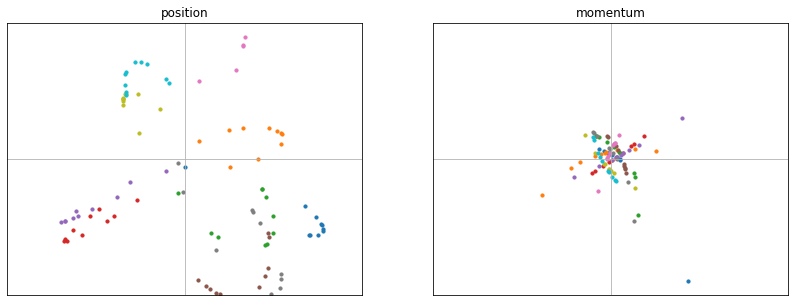

In [60]:
fig, axs = plt.subplots(1,2)


ax_plot(axs[0], train_orbits_dataset, 'position',idxs = [0,1], num_shown = 10)
ax_plot(axs[1], train_orbits_dataset, 'momentum',idxs = [2,3], num_shown = 10)




fig.set_size_inches(14, 5, forward=True)
plt.savefig('vary_orbit_position.png', dpi=100, bbox_inches='tight')


# Plotting Different variations in input conserved quantities

In [61]:
H_orbits_dataset = get_dataset("vary_orbit_jsons/H_vary.json", "../../saved_datasets")[0]
L_orbits_dataset = get_dataset("vary_orbit_jsons/L_vary.json", "../../saved_datasets")[0]
phi0_orbits_dataset = get_dataset("vary_orbit_jsons/phi0_vary.json", "../../saved_datasets")[0]

Settings specify to not use cached data. Make sure you want this; you're regenerating a dataset every time!
Settings specify to not use cached data. Make sure you want this; you're regenerating a dataset every time!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


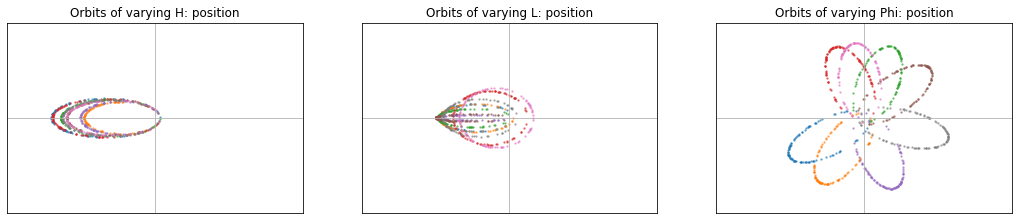

In [62]:
fig, axs = plt.subplots(1,3)

# ax_plot(axs[0], H_orbits_dataset, 'A) Orbits of varying H: position')
# ax_plot(axs[1], L_orbits_dataset, 'B) Orbits of varying L: position')
# ax_plot(axs[2], phi0_orbits_dataset, 'C) Orbits of varying Phi: position')
see = 8

ax_plot(axs[0], H_orbits_dataset, 'Orbits of varying H: position',idxs = [0,1], num_shown = see, alpha = 0.5, s = 2)
ax_plot(axs[1], L_orbits_dataset, 'Orbits of varying L: position',idxs = [0,1], num_shown = see, alpha = 0.5, s = 2)
ax_plot(axs[2], phi0_orbits_dataset, 'Orbits of varying Phi: position',idxs = [0,1], num_shown = see, alpha = 0.5, s = 2)




fig.set_size_inches(18, 3.5, forward=True)
plt.savefig('images/vary_conserved.eps', dpi=100, bbox_inches='tight')


# Orbit Density visualization

In [63]:
train_orbits_dataset = get_dataset("../data_configs/single_orbit.json", "../../saved_datasets")[0]

In [64]:
num = 100
fig = go.Figure(
    data=[go.Scatter3d(
    x=train_orbits_dataset.data[:num,:,0].flatten(),
    y=train_orbits_dataset.data[:num,:,1].flatten(),
    z=np.abs(rng.standard_normal(np.shape(train_orbits_dataset.data)[1] * num)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        line=dict(width=0)
    )#,
    #text=labels
)],
layout=go.Layout(height=800, width=1000))
# fig.show()